In [2]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import os
from sklearn.metrics import accuracy_score

# Étape 1 : Exploration des données

Charger les données depuis le fichier CSV

In [3]:
data = pd.read_csv('informations_images.csv')

In [4]:
# Afficher les premières lignes pour comprendre la structure
data.head()

,image,skin_color,genre
0,generated.photos_v3_0413135_0479926_0984100.jpg,Darkest,1
1,generated.photos_v3_0718125_0751102_0996407.jpg,Darkest,1
2,generated.photos_v3_0747878_0928212_0116355.jpg,Darkest,1
3,generated.photos_v3_0079389_0652990_0930906.jpg,Darkest,0
4,generated.photos_v3_0990057_0853581_0786469.jpg,Darkest,0


In [5]:
# Vérifier le nombre de valeurs uniques dans chaque colonne
data.nunique()

image         10000
skin_color        5
genre             2
dtype: int64

In [6]:
df = data.copy()
# Remplacer les valeurs 0 par "Female" et les valeurs 1 par "Male" dans la colonne 'genre'
df['genre'] = df['genre'].replace({0: 'Female', 1: 'Male'})

In [7]:
def effectif_variables(colonne):
    return df[colonne].value_counts().sort_index()

In [8]:
df1 = df.drop(["image"],axis=1)
interact(effectif_variables, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('skin_color', 'genre'), value='skin_color'), Ou…

In [9]:
def proportion(colonne):
    total = len(df)
    proportion = effectif_variables(colonne) / total
    return proportion

In [10]:
df1 = df.drop(["image"],axis=1)
interact(proportion, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('skin_color', 'genre'), value='skin_color'), Ou…

In [11]:
def count_plot(colonne):
    plt.figure(figsize=(12,4))
    subgrade_order = sorted(df[colonne].unique())
    sns.countplot(x=colonne,data=df,order = subgrade_order,palette='coolwarm' ,hue='genre')

In [12]:
df1 = df.drop(["image"],axis=1)
interact(count_plot, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('skin_color', 'genre'), value='skin_color'), Ou…

In [12]:
def bar_plot(colonne):
    plt.figure(figsize=(12,4))
    
    df[colonne].value_counts().plot(kind='bar') # normalize=True
    plt.ylabel('Proportion')
    plt.xlabel(f'Distribution of {colonne}')
    plt.show()

In [13]:
df1 = df.drop(["image"],axis=1)
interact(bar_plot, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('skin_color', 'genre'), value='skin_color'), Ou…

In [14]:
def hist_plot(colonne):
    plt.figure(figsize=(12,4))
    sns.histplot(data = df[colonne])
    plt.ylabel('Proportion')
    plt.xlabel(f'Distribution of {colonne}')
    plt.show()

In [17]:
#df1 = df.drop(["image"],axis=1)
#interact(hist_plot, colonne=df1);

In [18]:
def box_plot(colonne):
    plt.figure(figsize=(12,4))
    sns.boxplot(data = df[colonne])
    plt.ylabel('Proportion')
    plt.xlabel(f'Distribution of {colonne}')
    plt.show()

In [19]:
df1 = df.drop(["image"],axis=1)
interact(box_plot, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('skin_color', 'genre'), value='skin_color'), Ou…

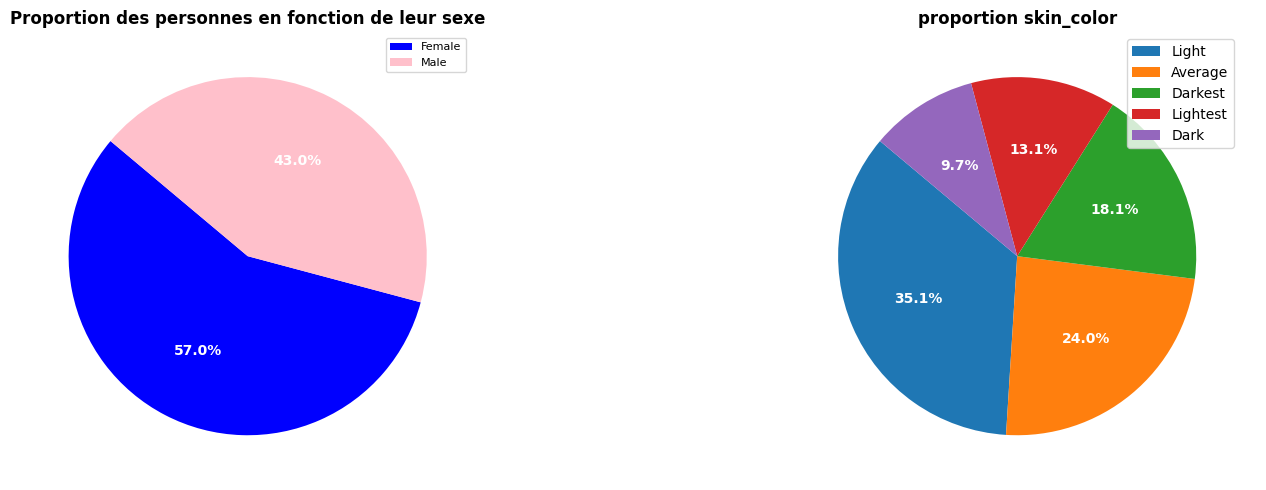

In [48]:
# Etude de proportion par rapport au sexe
sexe_counts = df['genre'].value_counts()
ethinic_counts = df['skin_color'].value_counts()

fig,(ax0, ax1) = plt.subplots(nrows = 1, ncols = 2,figsize=(18, 5))
ax0.pie(sexe_counts, labels=sexe_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'],
       textprops={'color': 'white', 'weight': 'bold'})
ax0.set_title('Proportion des personnes en fonction de leur sexe', fontweight='bold')
ax0.legend(prop={'size':8})

# Etude de proportion par rapport aux skin_colors
ax1.pie(ethinic_counts, labels= ethinic_counts.index, autopct='%1.1f%%', startangle=140,
       textprops={'color': 'white', 'weight': 'bold'})
ax1.set_title('proportion skin_color', fontweight='bold')
ax1.legend(prop={'size':10})


fig.tight_layout()
plt.show()

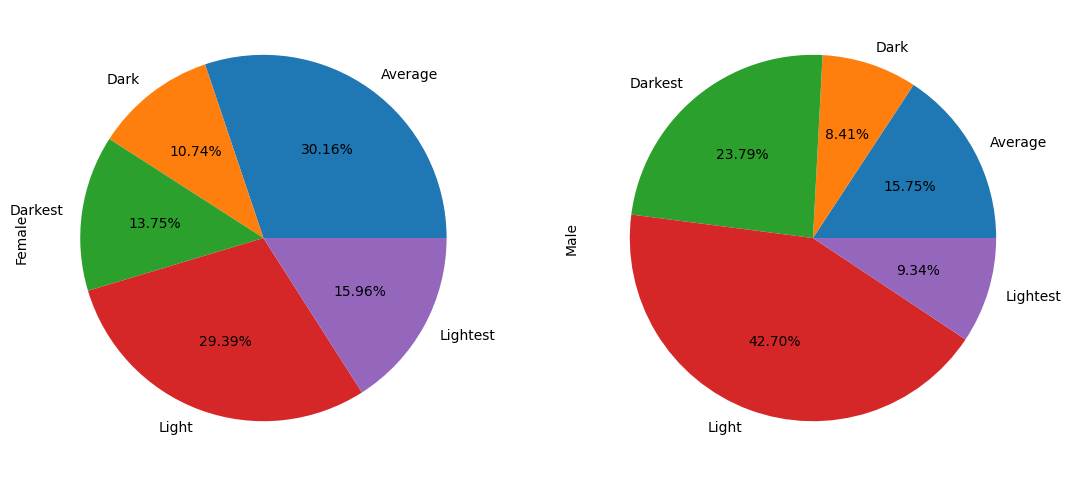

In [20]:
gender_counts = df.groupby('skin_color')['genre'].value_counts().unstack()
gender_counts.plot(kind='pie', subplots=True, figsize=(13, 8), autopct='%2.2f%%',legend=False)
plt.show()

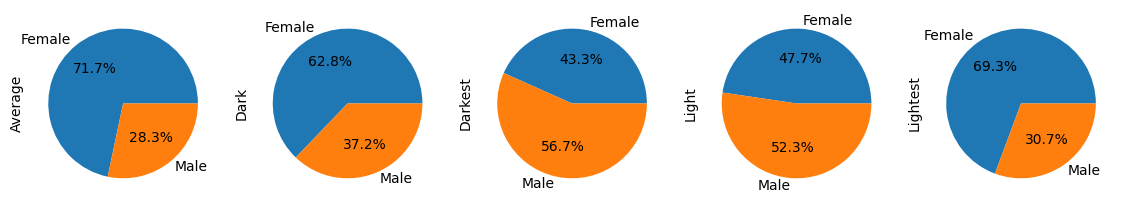

In [21]:
gender_counts = df.groupby('genre')['skin_color'].value_counts().unstack()
gender_counts.plot(kind='pie', subplots=True, figsize=(14, 9), autopct='%1.1f%%',legend=False)

plt.show()

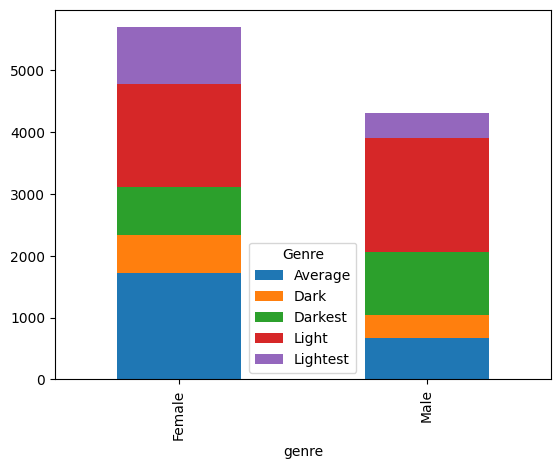

In [22]:
cross_tab = pd.crosstab(df['genre'], df['skin_color'])
stacked_bar = cross_tab.plot(kind='bar', stacked=True)
plt.legend(title='Genre')
plt.show()


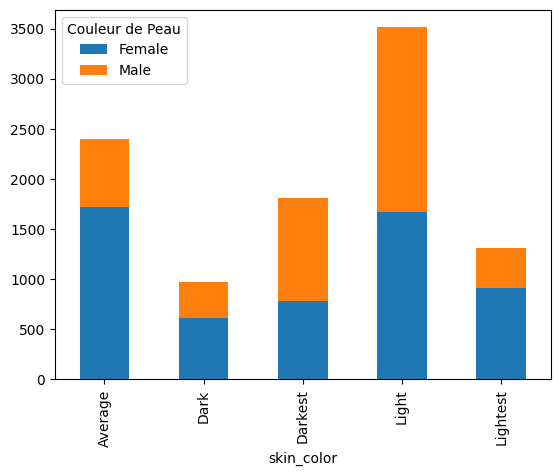

In [23]:
cross_tab = pd.crosstab(df['skin_color'], df['genre'])
stacked_bar = cross_tab.plot(kind='bar', stacked=True)
plt.legend(title='Couleur de Peau')
plt.show()


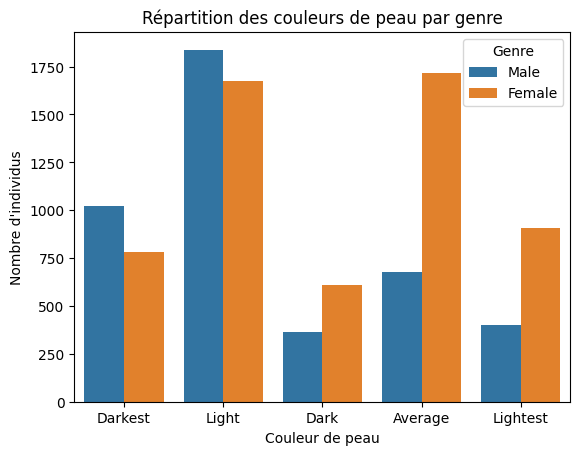

In [49]:
# Répartition des couleurs de peau par genre

sns.countplot(x='skin_color', hue='genre', data=df)
plt.xlabel('Couleur de peau')
plt.ylabel('Nombre d\'individus')
plt.title('Répartition des couleurs de peau par genre')
plt.legend(title='Genre')
plt.show()


# Analyse de la distribution du genre par couleur de peau 

Examiner la répartition du genre prédit pour chaque couleur de peau. Cela vous permettra de visualiser les tendances dans les prédictions de genre en fonction de la couleur de peau

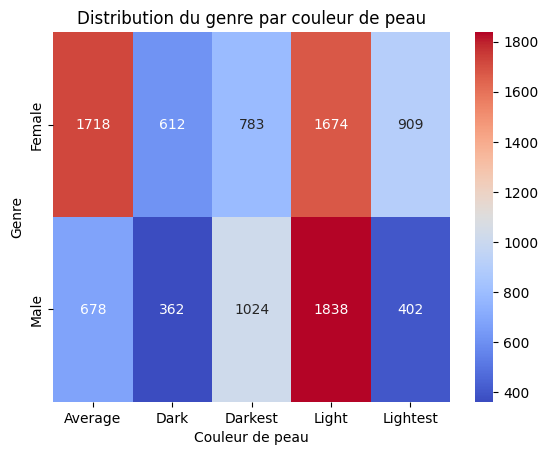

In [50]:
# Créer un tableau croisé du genre par couleur de peau
cross_tab = pd.crosstab(df['genre'], df['skin_color'])

# Visualiser la distribution du genre par couleur de peau
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Distribution du genre par couleur de peau')
plt.xlabel('Couleur de peau')
plt.ylabel('Genre')
plt.show()

# Étape 2 : Test d'independance

In [51]:
# Vérifier la distribution des catégories dans chaque colonne
# Ici, nous allons utiliser le test du chi-deux pour évaluer l'indépendance entre les variables catégorielles

In [52]:
def chi2_test(column1, column2):
    contingency_table = pd.crosstab(data[column1], data[column2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Test du Chi-deux pour {column1} et {column2}:")
    print(f"Chi2 : {chi2}, p-value : {p}")

chi2_test('genre', 'skin_color')

Test du Chi-deux pour genre et skin_color:
Chi2 : 568.7122187163013, p-value : 9.143195065658748e-122


Cela indique qu'il existe une dépendance significative entre le genre prédit par le modèle et la couleur de peau des personnes représentées dans les images. En d'autres termes, le genre prédit varie en fonction de la couleur de peau, ce qui suggère la présence potentielle de biais dans le modèle d'identification du genre en fonction de la couleur de peau.

# Résumé statistique des variables

# Calcul du coefficient de V de Cramer

In [24]:
import numpy as np

def cramers_v(chi2, n, r, c):
    """Calcul du coefficient de V de Cramer."""
    return np.sqrt(chi2 / (n * min(r-1, c-1)))

def calculate_cramers_v(chi2, contingency_table):
    """Calcul du coefficient de V de Cramer à partir du Chi2 et du tableau de contingence."""
    n = contingency_table.values.sum()  # Taille de l'échantillon
    r, c = contingency_table.shape  # Nombre de niveaux pour chaque variable
    
    # Calcul du coefficient de V de Cramer
    v_cramer = cramers_v(chi2, n, r, c)
    return v_cramer


chi2_value = 568.71221
contingency_table = pd.crosstab(df['genre'], df['skin_color']) 
v_cramer = calculate_cramers_v(chi2_value, contingency_table)

print(f"Coef. de V de Cramer : {v_cramer}")


Coef. de V de Cramer : 0.23847687728582828
